<a href="https://colab.research.google.com/github/justcme/PerformanceSpecs/blob/main/L_NHDLBarCharts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

OS

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/Colab Notebooks/LipidPerf/from_Pandas")

Mounted at /content/drive/


Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from operator import index
import pathlib

# DATA

###Average Error by Group

In [ ]:
Ndfs1 = {d.stem: pd.read_csv(d, index_col = 0) for d in pathlib.Path().glob('Old_Criteria/Stats/N*_means.csv')}
Ndfs1 = {k: Ndfs1[k] for k in sorted(Ndfs1)}
Ndfs2 = {d.stem: pd.read_csv(d, index_col = 0) for d in pathlib.Path().glob('New_Criteria/Stats/N*_means.csv')}
Ndfs2 = {k: Ndfs2[k] for k in sorted(Ndfs2)}

###Best and Worst Case Scenarios

In [ ]:
errorN1 = pd.read_csv("Old_Criteria/Error/errorN.csv")
errorN2 = pd.read_csv("New_Criteria/Error/errorN.csv")

In [ ]:
errorN1

,Step,Criteria,Scenario,Error Added,ReClassd_1,ReClassd_2,ReClassd_3,ReClassd_4,ReClassd_5,ReClassd_6,...,ReClassd_44,ReClassd_45,ReClassd_46,ReClassd_47,ReClassd_48,ReClassd_49,ReClassd_50,max,min,mean
0,1,old,0.0,BV,5.9,5.1,5.5,5.6,5.9,5.8,...,5.9,5.6,5.4,5.2,5.8,5.7,5.5,6.0,5.1,5.655769
1,2,old,0.1,CV,3.3,2.7,2.9,3.2,3.1,3.0,...,3.1,3.2,3.0,2.9,3.1,3.0,2.9,3.3,2.7,3.044231
2,3,old,0.2,BV + CV,6.3,6.4,6.2,6.5,6.6,6.4,...,6.6,6.3,6.3,6.3,6.5,6.4,6.4,7.0,5.9,6.451923
3,4,old,1.1,PB1 + CV,6.4,5.9,6.2,6.1,6.3,6.2,...,6.3,6.3,6.4,6.4,6.5,6.0,6.0,6.6,5.9,6.246154
4,5,old,1.2,PB1 + BV + CV,8.2,8.6,8.5,8.4,8.7,8.4,...,8.6,8.2,8.4,8.3,8.6,8.5,8.3,9.2,8.2,8.594231
5,6,old,2.1,PB2 + CV,4.8,4.6,4.7,4.3,4.6,4.6,...,4.6,4.5,4.5,4.2,4.8,4.5,4.7,4.9,4.2,4.607692
6,7,old,2.2,PB2 + BV + CV,6.8,7.3,6.9,6.8,7.0,6.9,...,7.5,7.1,6.9,6.5,7.1,7.2,6.9,7.5,6.5,6.955769


#Functions

###Remove values from cells AA, BB, CC

In [ ]:
def CleanMean(dodf):
  clean_dfs = {}
  for k,v in dodf.items():
    df_clean = v.copy()
    X = Y = np.arange(4)
    for x,y in zip(X,Y):
      df_clean.iloc[x,y]=0
    df_clean = df_clean*100
    clean_dfs[f'{k}_clean'] = df_clean
  return clean_dfs

###Create individual stacked bar charts

In [ ]:
def StackBar(df, letter, step, param, RC, coords, error):
  sns.set_theme(context = 'paper', style = 'white', font_scale = 1.3)
  colors = sns.color_palette('deep')
  df.plot(kind = 'bar', stacked = True, color = colors, figsize = (9,6))

  plt.xticks(rotation = 0, horizontalalignment = "center")
  plt.xlabel('New Group')
  plt.ylabel('Original Group (%)',labelpad = 10)
  plt.ylim(top=3)
  #plt.title('Variation in '+param + ' Risk Classification due to ' +error, fontdict = {'fontsize': 20}, pad = 20)
  plt.legend(title = 'Original \n Group', loc = 'best')
  text = str(RC) + '% misclassified'
  plt.annotate(text, xy=(coords), xycoords='axes fraction')
  sns.despine()
  fig = plt.gcf()
  fig.savefig('Figures/Variation_' +letter +str(step) +'barchart_fxn.jpg', dpi = 600)
  return (fig, letter+str(step)+'_barchart.jpg')

#Data Manipulation

In [ ]:
cleandfs_N1 = CleanMean(Ndfs1)
cleandfs_N2= CleanMean(Ndfs2)

In [ ]:
df_steps = list(range(1,8))
Ntext_coords = [(0.05, 0.93),(0.025, 0.93),(0.05, 0.93),(0.15, 0.98),(0.15, 0.93),(0.25, 0.93),(0.25, 0.93)]

In [ ]:
CRC_N1 =[round(v.sum(axis=1), ndigits = 2) for k,v in cleandfs_N1.items()]
RC_N1 = [round(v.values.sum(), ndigits = 1) for k,v in cleandfs_N1.items()]
CRC_N2 =[round(v.sum(axis=1), ndigits = 2) for k,v in cleandfs_N2.items()]
RC_N2 = [round(v.values.sum(), ndigits = 1) for k,v in cleandfs_N2.items()]

#Create non-HDL Charts

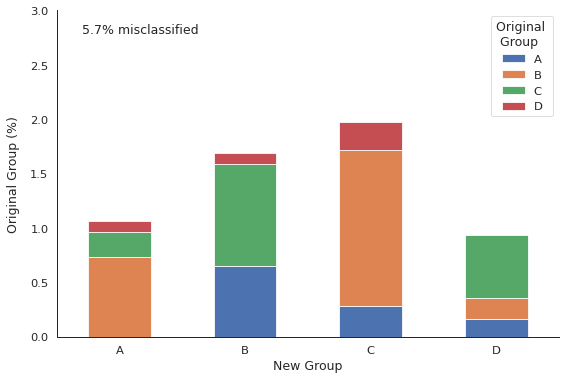

In [ ]:
BVbar_N = StackBar(cleandfs_N1['N1_means_clean'], 'N', 0, 'nonHDL-C', RC_N1[0], Ntext_coords[0], 'BV')

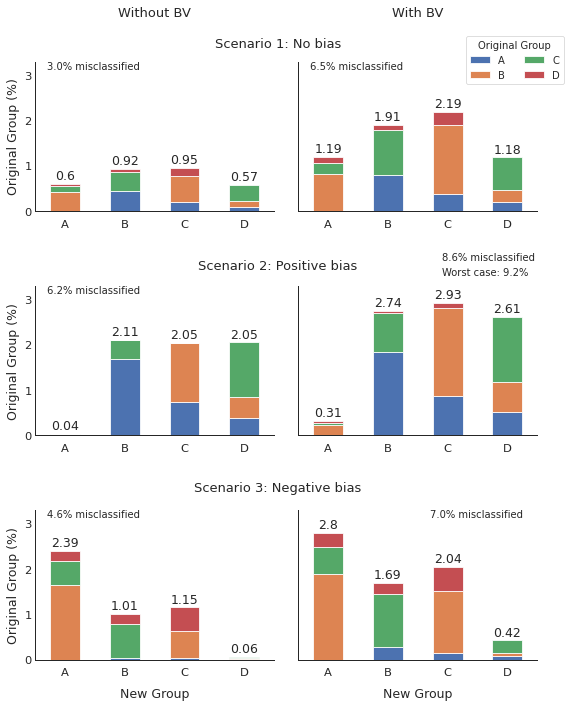

In [ ]:
fig1, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows = 3, ncols = 2, sharex = True, sharey = True, gridspec_kw={'wspace': 0.1, 'hspace': 0.5})

#fig.suptitle('Variation in Risk Classification due to Old non-HDL-C Error', fontsize = 15, y= 1)

colors = sns.color_palette('deep')


cleandfs_N1['N2_means_clean'].plot(ax = ax1, kind = 'bar', stacked = True, legend = False,
                                figsize = (9,11), color = colors,
                                ylabel = 'Original Group (%)')
cleandfs_N1['N3_means_clean'].plot(ax = ax2, kind = 'bar', stacked = True,  
                                figsize = (9,11), color = colors)
cleandfs_N1['N4_means_clean'].plot(ax = ax3, kind = 'bar', stacked = True, legend  = False,
                                figsize = (9,11), color = colors,
                                ylabel = 'Original Group (%)')
cleandfs_N1['N5_means_clean'].plot(ax = ax4, kind = 'bar', stacked = True, legend  = False,
                                figsize = (9,11), color = colors)
cleandfs_N1['N6_means_clean'].plot(ax = ax5, kind = 'bar', stacked = True, legend  = False,
                                figsize = (9,11), color = colors,
                                rot = 0, xlabel = 'New Group', ylabel = 'Original Group (%)')
cleandfs_N1['N7_means_clean'].plot(ax = ax6, kind = 'bar', stacked = True, legend  = False,
                                figsize = (9,11), color = colors,
                                xlabel = 'New Group', rot = 0)

N_coords = [(0.05, 0.95),(0.05, 0.95),(0.05, 0.95),(0.6, 1.17),(0.05, 0.95),(0.55, 0.95)]
y_offset = 0.1
x_units = [0, 1, 2, 3]

axes = [ax1,ax2,ax3,ax4,ax5,ax6]
for ax,r,c,k in zip(axes, RC_N1[1:], N_coords, CRC_N1[1:]):
  text1 = str(r) + '% misclassified'
  ax.annotate(text1, xy=(c), xycoords='axes fraction', fontsize = 10)
  for h,x in zip(k, x_units):
    ax.text(x, h+y_offset, h, ha = 'center')
  sns.despine()

cols = ['{} BV'.format(col) for col in ['Without','With']]
for ax, col in zip([ax1,ax2], cols):
    ax.set_title(col,pad=45,fontsize = 13)

plt.figtext(0.5,0.91, "Scenario 1: No bias", ha="center", va="top", fontsize=13)
plt.figtext(0.5,0.63, "Scenario 2: Positive bias", ha="center", va="top", fontsize=13)
plt.figtext(0.5,0.35, "Scenario 3: Negative bias", ha="center", va="top", fontsize=13)

ax4.annotate(f"Worst case: {errorN1.loc[4,'max']}%", xy=(0.6, 1.07), xycoords = 'axes fraction', fontsize = 10)
ax5.xaxis.labelpad = 10
ax6.xaxis.labelpad = 10
legend=ax2.legend(title = 'Original Group', loc = (0.7,0.85), fontsize = 10, ncols=2)
plt.setp(legend.get_title(),fontsize=10)

for ax in axes:
  ax.tick_params(axis = 'x', labelbottom=True)
  ax.tick_params(axis = 'y',which = 'both', length=0)
  ax.set_yticks([0,1,2,3])
  ax.set_ylim(0,3.3)

#fig.savefig('Figures/nHDL-C_barcharts_old.png', dpi = 600)
fig1.savefig('Figures/nHDL-C_barcharts_old.jpg', dpi = 600)

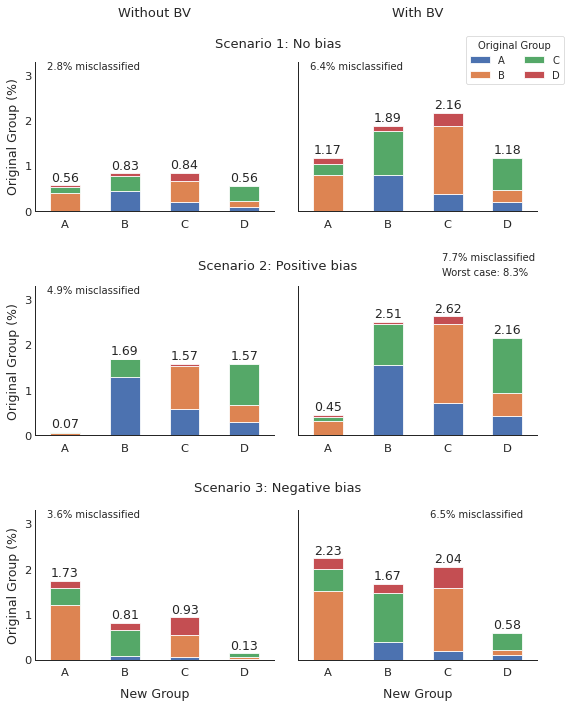

In [ ]:
fig2, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows = 3, ncols = 2, sharex = True, sharey = True, gridspec_kw={'wspace': 0.1, 'hspace': 0.5})

#fig.suptitle('Variation in Risk Classification due to Old non-HDL-C Error', fontsize = 15, y= 1)

colors = sns.color_palette('deep')


cleandfs_N2['N2_means_clean'].plot(ax = ax1, kind = 'bar', stacked = True, legend = False,
                                figsize = (9,11), color = colors,
                                ylabel = 'Original Group (%)')
cleandfs_N2['N3_means_clean'].plot(ax = ax2, kind = 'bar', stacked = True,  
                                figsize = (9,11), color = colors)
cleandfs_N2['N4_means_clean'].plot(ax = ax3, kind = 'bar', stacked = True, legend  = False,
                                figsize = (9,11), color = colors,
                                ylabel = 'Original Group (%)')
cleandfs_N2['N5_means_clean'].plot(ax = ax4, kind = 'bar', stacked = True, legend  = False,
                                figsize = (9,11), color = colors)
cleandfs_N2['N6_means_clean'].plot(ax = ax5, kind = 'bar', stacked = True, legend  = False,
                                figsize = (9,11), color = colors,
                                rot = 0, xlabel = 'New Group', ylabel = 'Original Group (%)')
cleandfs_N2['N7_means_clean'].plot(ax = ax6, kind = 'bar', stacked = True, legend  = False,
                                figsize = (9,11), color = colors,
                                xlabel = 'New Group', rot = 0)

N_coords = [(0.05, 0.95),(0.05, 0.95),(0.05, 0.95),(0.6, 1.17),(0.05, 0.95),(0.55, 0.95)]
y_offset = 0.1
x_units = [0, 1, 2, 3]

axes = [ax1,ax2,ax3,ax4,ax5,ax6]
for ax,r,c,k in zip(axes, RC_N2[1:], N_coords, CRC_N2[1:]):
  text1 = str(r) + '% misclassified'
  ax.annotate(text1, xy=(c), xycoords='axes fraction', fontsize = 10)
  for h,x in zip(k, x_units):
    ax.text(x, h+y_offset, h, ha = 'center')
  sns.despine()

cols = ['{} BV'.format(col) for col in ['Without','With']]
for ax, col in zip([ax1,ax2], cols):
    ax.set_title(col,pad=45,fontsize = 13)

plt.figtext(0.5,0.91, "Scenario 1: No bias", ha="center", va="top", fontsize=13)
plt.figtext(0.5,0.63, "Scenario 2: Positive bias", ha="center", va="top", fontsize=13)
plt.figtext(0.5,0.35, "Scenario 3: Negative bias", ha="center", va="top", fontsize=13)

ax4.annotate(f"Worst case: {errorN2.loc[4,'max']}%", xy=(0.6, 1.07), xycoords = 'axes fraction', fontsize = 10)
ax5.xaxis.labelpad = 10
ax6.xaxis.labelpad = 10
legend=ax2.legend(title = 'Original Group', loc = (0.7,0.85), fontsize = 10, ncols=2)
plt.setp(legend.get_title(),fontsize=10)

for ax in axes:
  ax.tick_params(axis = 'x', labelbottom=True)
  ax.tick_params(axis = 'y',which = 'both', length=0)
  ax.set_yticks([0,1,2,3])
  ax.set_ylim(0,3.3)

#fig.savefig('Figures/nHDL-C_barcharts_old.png', dpi = 600)
fig2.savefig('Figures/nHDL-C_barcharts_new.jpg', dpi = 600)